<a href="https://colab.research.google.com/github/theadityashukla/EDA_SPECT_Heart/blob/master/SPECT/Cardiac_Analysis_SPECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Dask-ML

(Necessary)

In [0]:
pip install dask_ml

In [0]:
pip install -U ipykernel

# SPECT

## Loading Dependencies

In [0]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

## Importing the Data Set

In [0]:
df=dd.read_csv("https://raw.githubusercontent.com/theadityashukla/EDA_SPECT_Heart/master/SPECT/SPECT_train.csv")
df.head()

,1,0,0.1,0.2,1.1,0.3,0.4,0.5,1.2,1.3,0.6,0.7,0.8,1.4,1.5,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16
0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1
1,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1
3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1


In [0]:
target=df[['1']]
df=df.drop(labels='1',axis=1)

In [0]:
column_head=[(lambda x: "F"+str(x)) (x) for x in range(1,23)]

In [0]:
df.columns=column_head

In [0]:
dft=dd.read_csv("https://raw.githubusercontent.com/theadityashukla/EDA_SPECT_Heart/master/SPECT/SPECT_test.csv")
dft.head()

,1,1.1,0,0.1,1.2,1.3,0.2,0.3,0.4,1.4,1.5,0.5,0.6,0.7,1.6,1.7,1.8,0.8,0.9,1.9,1.10,0.10,0.11
0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
2,1,0,1,1,1,0,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1
4,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1


In [0]:
test_target=dft[['1']]
dft=dft.drop(labels='1',axis=1)
column_head=[(lambda x: "F"+str(x)) (x) for x in range(1,23)]
dft.columns=column_head

In [0]:
dft.head(2)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1


In [0]:
df.head(1)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1


In [0]:
target.tail(5)

,1
74,0
75,0
76,0
77,0
78,0


## Principal Component Analysis

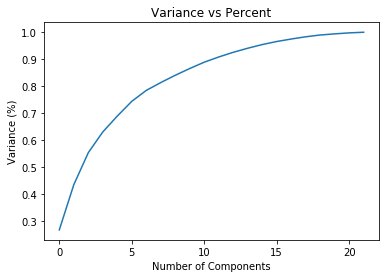

In [0]:
from sklearn.decomposition import PCA
pca = PCA().fit(df)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Variance vs Percent')
plt.show()

In [0]:
from dask_ml.decomposition import PCA

In [0]:
pc=PCA(n_components=14,svd_solver='randomized').fit(df)

In [0]:
x_train=pca.transform(df)

In [0]:
x_train

array([[ 0.53208394, -1.49922624,  0.67358669, ...,  0.07239487,
        -0.01250573,  0.03833736],
       [ 0.477135  ,  0.24471741,  1.32206246, ...,  0.07282303,
         0.13712894,  0.11925542],
       [-0.29371074, -0.21342641, -0.55304989, ..., -0.16794232,
        -0.01294002,  0.13400014],
       ...,
       [-0.15737427,  1.33657515,  0.74417957, ..., -0.04111862,
         0.06787356,  0.04714857],
       [ 0.90386912, -1.26199274, -0.4508982 , ...,  0.07095874,
        -0.1440586 ,  0.05868129],
       [-0.5683797 ,  0.72830878,  0.46701424, ..., -0.00778361,
        -0.03415086, -0.2625022 ]])

In [0]:
x_test=pca.transform(dft)
x_test

array([[ 0.14195808,  0.53143498,  1.06502737, ...,  0.23097927,
         0.15377237, -0.00186828],
       [ 0.02982724, -0.44133227, -0.1726548 , ..., -0.03161179,
        -0.02019082,  0.29738547],
       [ 1.33058094, -1.23841728, -0.51580372, ..., -0.23056729,
         0.33001041, -0.29510299],
       ...,
       [ 0.54492179, -0.3034595 ,  1.03545069, ..., -0.39251778,
         0.08789074, -0.18914974],
       [ 0.60841875, -0.13791638,  1.03440636, ..., -0.214491  ,
        -0.01197096, -0.18840695],
       [-1.07117436, -0.07955043, -0.06079452, ..., -0.00749578,
        -0.02935175,  0.01596578]])

## Support Vector Machines

In [0]:
from sklearn import svm

### Kernel: Linear ; C=10

In [0]:
svc=svm.SVC(kernel='linear',C=10)
svc.fit(x_train,target)
pred_val=svc.predict(x_test)
accuracy_score(test_target,pred_val)

### Kernel: RBF ; C=25 ; Gamma = 3

In [0]:
from sklearn.metrics import accuracy_score
svc=svm.SVC(kernel='rbf',C=25,gamma=3)
svc.fit(x_train,target)
pred_val=svc.predict(x_test)
accuracy_score(test_target,pred_val)

### Kernel: Gaussian Kernel ; C=940 ; Gamma = 0.004

In [0]:
from sklearn.gaussian_process.kernels import RBF
gsvc=svm.SVC(kernel=RBF(),C=940,gamma=0.004).fit(x_train,target)
predict_gsvc=gsvc.predict(x_test)
accuracy_score(test_target,predict_gsvc)

## Naive Bayes

### Gaussian

In [0]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB().fit(x_train,target)
naive_prediction=naive.predict(x_test)
accuracy_score(test_target,naive_prediction)

### Bernoulli

In [0]:
from sklearn.naive_bayes import BernoulliNB
naive_bern=BernoulliNB(alpha=8).fit(x_train,target)
nb_predict=naive_bern.predict(x_test)
accuracy_score(test_target,nb_predict)